# In this project I have tried to build a model to predict the next location of our seagull

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
bird_df = pd.read_csv('/content/drive/MyDrive/bird_tracking.csv')

In [ ]:
bird_df.sample(1)

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
11007,3,2014-01-03 16:00:38+00,851,-64.423014,30.438492,-9.649463,1.677051,Eric


# Univariate analysis:

In [ ]:
bird_names = pd.unique(bird_df.bird_name)

In [ ]:
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

In [ ]:
a = bird_df.groupby(['bird_name']).size()
a

bird_name
Eric     19795
Nico     21121
Sanne    21004
dtype: int64

In [ ]:
bird_df.isnull().sum()

altitude                0
date_time               0
device_info_serial      0
direction             443
latitude                0
longitude               0
speed_2d              443
bird_name               0
dtype: int64

In [ ]:
#Use interpolation to input missing values
bird_df = bird_df.interpolate(method='linear')

In [ ]:
bird_df.isnull().sum()

altitude              0
date_time             0
device_info_serial    0
direction             0
latitude              0
longitude             0
speed_2d              0
bird_name             0
dtype: int64

In [ ]:
bird_df['device_info_serial'].value_counts()

864    21121
833    21004
851    19795
Name: device_info_serial, dtype: int64

In [ ]:
bird_df.sample(5)

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
31628,-7,2014-01-05 06:57:33+00,864,117.241553,18.894258,-16.183919,1.811077,Nico
9626,24,2013-12-18 04:01:46+00,851,156.798606,30.429451,-9.643789,0.830060,Eric
42081,559,2013-08-29 12:18:55+00,833,-130.554490,49.340595,0.131699,11.682264,Sanne
16831,9,2014-03-14 23:30:22+00,851,-145.842712,30.428969,-9.642462,1.451241,Eric
24061,211,2013-10-05 09:43:13+00,864,4.291899,50.205352,4.391217,1.684429,Nico


# Bivariate/Multivariate analysis:

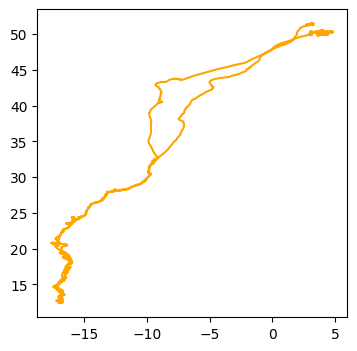

In [ ]:
import matplotlib.pyplot as plt
bird_names = pd.unique(bird_df.bird_name)
index = bird_df.bird_name == "Nico"
x = bird_df.longitude[index]
y = bird_df.latitude[index]
plt.figure(figsize = (4,4))
plt.plot(x,y,"orange")

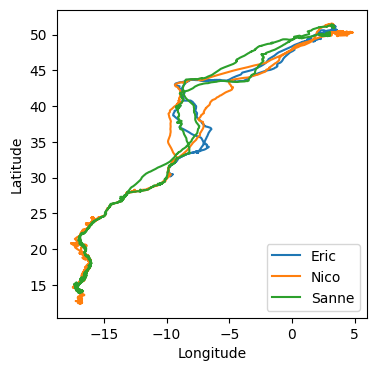

In [ ]:
plt.figure(figsize = (4,4))
for bird_name in bird_names:
    index = bird_df.bird_name == bird_name
    x = bird_df.longitude[index]
    y = bird_df.latitude[index]
    plt.plot(x,y,label=bird_name)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")
plt.show()

In [ ]:
import folium
from IPython.core.display import HTML

bird_groups = bird_df.groupby('bird_name')

colors = {'Eric': 'red', 'Nico': 'blue', 'Sanne': 'green'}

center_lat = bird_groups.get_group(list(bird_groups.groups.keys())[0]).iloc[0]['latitude']
center_lon = bird_groups.get_group(list(bird_groups.groups.keys())[0]).iloc[0]['longitude']

m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

for bird_name, group in bird_groups:
    bird_path = list(zip(group['latitude'], group['longitude']))
    color = colors[bird_name]
    folium.PolyLine(locations=bird_path, color=color, weight=2.5, opacity=1).add_to(m)

m.save('bird_path1.html')
HTML('<iframe src="bird_path1.html" width="100%" height="500"></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


#Preprocessing

In [ ]:
# Split the data into separate datasets for each bird
eric_df = bird_df[bird_df['bird_name'] == 'Eric']
nico_df = bird_df[bird_df['bird_name'] == 'Nico']
sanne_df = bird_df[bird_df['bird_name'] == 'Sanne']

In [ ]:
# Add the next_latitude and next_longitude features
eric_df['next_latitude'] = eric_df['latitude'].shift(-1)
eric_df['next_longitude'] = eric_df['longitude'].shift(-1)
nico_df['next_latitude'] = nico_df['latitude'].shift(-1)
nico_df['next_longitude'] = nico_df['longitude'].shift(-1)
sanne_df['next_latitude'] = sanne_df['latitude'].shift(-1)
sanne_df['next_longitude'] = sanne_df['longitude'].shift(-1)

<ipython-input-16-23d2fe072559>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eric_df['next_latitude'] = eric_df['latitude'].shift(-1)
<ipython-input-16-23d2fe072559>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eric_df['next_longitude'] = eric_df['longitude'].shift(-1)
<ipython-input-16-23d2fe072559>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:
# Drop the last row of each dataset to remove NaN values in the target variable
eric_df.drop(eric_df.tail(1).index, inplace=True)
nico_df.drop(nico_df.tail(1).index, inplace=True)
sanne_df.drop(sanne_df.tail(1).index, inplace=True)

<ipython-input-17-cd07ed182568>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eric_df.drop(eric_df.tail(1).index, inplace=True)
<ipython-input-17-cd07ed182568>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nico_df.drop(nico_df.tail(1).index, inplace=True)
<ipython-input-17-cd07ed182568>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanne_df.drop(sanne_df.tail(1).index, inplace=True)


In [ ]:
bird_df_new = pd.concat([eric_df, nico_df, sanne_df])

In [ ]:
bird_df_new.sample(1)

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,next_latitude,next_longitude
19736,-1,2014-04-29 18:40:13+00,851,10.311695,51.34651,3.179788,2.764073,Eric,51.346282,3.179896


#Applying ML Methods to predict the next location of the bird

In [ ]:
# Define the features and target
X = bird_df_new[['altitude','direction','latitude','longitude','speed_2d']]
y = bird_df_new[['next_latitude', 'next_longitude']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###1) Decision Tree Classifier

In [ ]:
# Train the decision tree model
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = dt_model.predict(X_test)

In [ ]:
# Evaluate the model using the mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.03689889659229241


###2) Random forest classifier

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=200, max_depth=7, random_state=42)

multioutput_rf_model = MultiOutputRegressor(rf_model)

multioutput_rf_model.fit(X_train, y_train)

# make predictions
y_pred_2 = multioutput_rf_model.predict(X_test)

In [ ]:
#Hyperparameter tuning
# from sklearn.model_selection import GridSearchCV
# param_grid = {'estimator__n_estimators': [100, 200, 500],
#               'estimator__max_depth': [3, 5, 7, 9]}
# grid_search = GridSearchCV(multioutput_rf_model, param_grid=param_grid, cv=5)

# # fit the GridSearchCV object on the entire X_train and y_train arrays
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=500, max_depth=7, random_state=42)

# create a MultiOutputRegressor object and pass the RandomForestRegressor as an argument
multioutput_rf_model = MultiOutputRegressor(rf_model)

# fit the multioutput_rf_model on the entire X_train and y_train arrays
multioutput_rf_model.fit(X_train, y_train)

# make predictions
y_pred_2 = multioutput_rf_model.predict(X_test)

In [ ]:
# Evaluate the model using the mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_2)
rmse = np.sqrt(mse)
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error:  0.0023956631350064064
Root Mean Squared Error: 0.048945511898502055


###3)Adaboost

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

#Hyperparameter tuning
# # create an AdaBoostRegressor object
# ada_model = AdaBoostRegressor()

# # create a MultiOutputRegressor object and pass the AdaBoostRegressor as an argument
# multioutput_ada_model = MultiOutputRegressor(ada_model)

# # define a range of hyperparameters to search over
# param_grid = {'estimator__n_estimators': [100, 200, 300],
#               'estimator__learning_rate': [0.01, 0.1, 0.2]}

# # create a GridSearchCV object with the multioutput_ada_model and the param_grid
# grid_search = GridSearchCV(multioutput_ada_model, param_grid=param_grid, cv=5)

# # fit the GridSearchCV object on the entire X_train and y_train arrays
# grid_search.fit(X_train, y_train)

# print the best parameters and the best score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

In [ ]:
# create an AdaBoostRegressor object
ada_model = AdaBoostRegressor(n_estimators=300, learning_rate=0.2, random_state=42)

# create a MultiOutputRegressor object and pass the AdaBoostRegressor as an argument
multioutput_ada_model = MultiOutputRegressor(ada_model)

# fit the multioutput_ada_model on the entire X_train and y_train arrays
multioutput_ada_model.fit(X_train, y_train)

# make predictions
y_pred_3 = multioutput_ada_model.predict(X_test)

In [ ]:
# Evaluate the model using the mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_3)
rmse = np.sqrt(mse)
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error:  0.26827232350052466
Root Mean Squared Error: 0.5179501168071349


###4)XGBoost

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

#Hyperparameter tuning
# # create an XGBRegressor object
# xgb_model = XGBRegressor()

# # create a MultiOutputRegressor object and pass the XGBRegressor as an argument
# multioutput_xgb_model = MultiOutputRegressor(xgb_model)

# # define a range of hyperparameters to search over
# param_grid = {'estimator__n_estimators': [100, 200, 500],
#               'estimator__learning_rate': [0.01, 0.1, 0.2]}

# # create a GridSearchCV object with the multioutput_xgb_model and the param_grid
# grid_search = GridSearchCV(multioutput_xgb_model, param_grid=param_grid, cv=5)

# # fit the GridSearchCV object on the entire X_train and y_train arrays
# grid_search.fit(X_train, y_train)

# # print the best parameters and the best score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

In [ ]:
# create an XGBRegressor object
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=5, random_state=42)

# create a MultiOutputRegressor object and pass the XGBRegressor as an argument
multioutput_xgb_model = MultiOutputRegressor(xgb_model)

# fit the multioutput_xgb_model on the entire X_train and y_train arrays
multioutput_xgb_model.fit(X_train, y_train)

# make predictions
y_pred_4 = multioutput_xgb_model.predict(X_test)

In [ ]:
# Evaluate the model using the mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_4)
rmse = np.sqrt(mse)
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error:  0.0004949805133399616
Root Mean Squared Error: 0.022248157526859647


# Performance evaluation

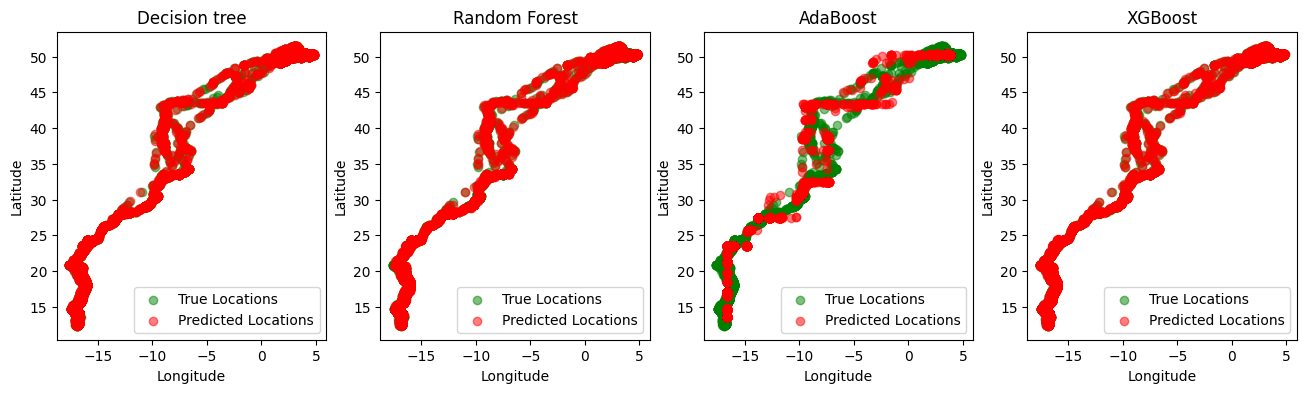

In [ ]:
import matplotlib.pyplot as plt
# create a figure with two subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

# plot for decision tree
axs[0].scatter(y_test.iloc[:, 1], y_test.iloc[:, 0], color='green', alpha=0.5, label='True Locations')
axs[0].scatter(y_pred[:, 1], y_pred[:, 0], color='red', alpha=0.5, label='Predicted Locations')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
axs[0].legend()
axs[0].set_title('Decision tree')

# plot for random forest
axs[1].scatter(y_test.iloc[:, 1], y_test.iloc[:, 0], color='green', alpha=0.5, label='True Locations')
axs[1].scatter(y_pred_2[:, 1], y_pred_2[:, 0], color='red', alpha=0.5, label='Predicted Locations')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
axs[1].legend()
axs[1].set_title('Random Forest')

# plot for AdaBoost
axs[2].scatter(y_test.iloc[:, 1], y_test.iloc[:, 0], color='green', alpha=0.5, label='True Locations')
axs[2].scatter(y_pred_3[:, 1], y_pred_3[:, 0], color='red', alpha=0.5, label='Predicted Locations')
axs[2].set_xlabel('Longitude')
axs[2].set_ylabel('Latitude')
axs[2].legend()
axs[2].set_title('AdaBoost')


# plot for XGBoost
axs[3].scatter(y_test.iloc[:, 1], y_test.iloc[:, 0], color='green', alpha=0.5, label='True Locations')
axs[3].scatter(y_pred_4[:, 1], y_pred_4[:, 0], color='red', alpha=0.5, label='Predicted Locations')
axs[3].set_xlabel('Longitude')
axs[3].set_ylabel('Latitude')
axs[3].legend()
axs[3].set_title('XGBoost')

# display the figure
plt.show()

In [ ]:
X_test.head(1)

,altitude,direction,latitude,longitude,speed_2d
41229,61,-63.500159,50.36492,3.02822,2.845385


In [ ]:
new_data = pd.DataFrame({
    'altitude': [61],
    'direction': [-63.500159],
    'latitude': [50.36492],
    'longitude': [3.02822],
    'speed_2d': [2.845385],
})
predicted_location_dt = dt_model.predict(new_data)
predicted_location_rf = multioutput_rf_model.predict(new_data)
predicted_location_ada = multioutput_ada_model.predict(new_data)
predicted_location_xgb = multioutput_xgb_model.predict(new_data)
print("Predicted Location by Decision Tree regressor:", predicted_location_dt)
print("Predicted Location by Random Forest regressor:", predicted_location_rf)
print("Predicted Location by AdaBoost regressor:", predicted_location_ada)
print("Predicted Location by XGBoost regressor:", predicted_location_xgb)

Predicted Location by Decision Tree regressor: [[50.3663812  3.0273708]]
Predicted Location by Random Forest algorithm: [[50.3790756   3.00165462]]
Predicted Location by AdaBoost algorithm: [[50.28849083  3.46725175]]
Predicted Location by XGBoost algorithm: [[50.35954    3.0225868]]


In [ ]:
bird_df_new.iloc[41229]

altitude                                  87
date_time             2013-08-18 21:27:57+00
device_info_serial                       833
direction                         175.186937
latitude                           50.364751
longitude                           3.028164
speed_2d                            3.283733
bird_name                              Sanne
next_latitude                      50.364896
next_longitude                      3.028211
Name: 41231, dtype: object

In [ ]:
#Final performance:
print("Decision Tree regressor: ")
mse1 = mean_squared_error(y_test, y_pred)
rmse1 = np.sqrt(mse1)
print("Mean Squared Error: ",mse1)
print("Root Mean Squared Error:", rmse1)


print("Random forest algorithm: ")
mse2 = mean_squared_error(y_test, y_pred_2)
rmse2 = np.sqrt(mse2)
print("Mean Squared Error: ",mse2)
print("Root Mean Squared Error:", rmse2)


print("AdaBoost regressor: ")
mse3 = mean_squared_error(y_test, y_pred_3)
rmse3 = np.sqrt(mse3)
print("Mean Squared Error: ",mse3)
print("Root Mean Squared Error:", rmse3)


print("XGBoost algorithm: ")
mse4 = mean_squared_error(y_test, y_pred_4)
rmse4 = np.sqrt(mse4)
print("Mean Squared Error: ",mse4)
print("Root Mean Squared Error:", rmse4)

Decision Tree regressor: 
Mean Squared Error:  0.0013615285697286886
Root Mean Squared Error: 0.03689889659229241
Random forest algorithm: 
Mean Squared Error:  0.0023956631350064064
Root Mean Squared Error: 0.048945511898502055
AdaBoost regressor: 
Mean Squared Error:  0.26827232350052466
Root Mean Squared Error: 0.5179501168071349
XGBoost algorithm: 
Mean Squared Error:  0.0004949805133399616
Root Mean Squared Error: 0.022248157526859647


#Conclusion: There is potential for incorporating XGBoost for next location predictions in Bird Migration analysis.